In [164]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

covid_data = pd.read_csv('google_new.csv')
print(covid_data.shape)
print(covid_data.head(20))


(817, 11)
   iso    country        date  grocery_pharmacy   parks  residential  \
0   AR  Argentina  2020-02-23             8.185  17.563        0.437   
1   AR  Argentina  2020-02-24           -15.875  25.605        6.321   
2   AR  Argentina  2020-02-25           -17.135   1.325        6.895   
3   AR  Argentina  2020-02-26             2.304   5.399       -2.273   
4   AR  Argentina  2020-02-27            -0.404  -5.267       -0.493   
5   AR  Argentina  2020-02-28             2.075  -7.859       -0.577   
6   AR  Argentina  2020-02-29             4.685  -7.582        1.409   
7   AR  Argentina  2020-03-01             2.873 -10.518        2.417   
8   AR  Argentina  2020-03-02             3.958  -8.264       -1.363   
9   AR  Argentina  2020-03-03             5.090  -6.241       -1.330   
10  AR  Argentina  2020-03-04             2.898  -0.579       -1.916   
11  AR  Argentina  2020-03-05             4.236  -8.884       -1.491   
12  AR  Argentina  2020-03-06             7.630  -6.79

In [134]:
assert len(covid_data.loc[(covid_data['grocery_pharmacy'].isnull()) | 
               (covid_data['parks'].isnull()) | 
               (covid_data['residential'].isnull()) | 
               (covid_data['retail_recreation'].isnull()) |
               (covid_data['transit_stations'].isnull()) |
               (covid_data['workplaces'].isnull()) |
               (covid_data['total_cases'].isnull()) |
               (covid_data['fatalities'].isnull()) |
               (covid_data['iso'].isnull()) |
               (covid_data['country'].isnull()) |
               (covid_data['date'].isnull())]) == 0

In [154]:
##covid_data.describe().transpose()

In [247]:
str_column =['iso','country']
target_column = ['total_cases','fatalities'] 
predictors = list(set(list(covid_data.columns))-set(target_column)-set(str_column))
covid_data[predictors] = covid_data[predictors]
print(covid_data.columns)
covid_data.describe().transpose()

Index(['iso', 'country', 'date', 'grocery_pharmacy', 'parks', 'residential',
       'retail_recreation', 'transit_stations', 'workplaces', 'total_cases',
       'fatalities'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
grocery_pharmacy,817.0,-0.082294,0.213134,-0.84798,-0.16578,0.00088,0.04838,0.59474
parks,817.0,-0.133940,0.328916,-0.91456,-0.32841,-0.06498,0.06961,0.75002
residential,817.0,0.095458,0.105454,-0.03647,0.00744,0.05912,0.16695,0.40343
retail_recreation,817.0,-0.262053,0.309927,-0.95158,-0.49975,-0.14427,-0.00632,0.19699
transit_stations,817.0,-0.283701,0.302110,-0.88956,-0.54145,-0.19502,-0.00970,0.16822
workplaces,817.0,-0.191262,0.259830,-0.79293,-0.40582,-0.08395,0.01037,0.21347
total_cases,817.0,10699.773562,31656.464952,0.00000,27.00000,648.00000,4585.00000,336912.00000
fatalities,817.0,566.007344,2008.520488,0.00000,0.00000,6.00000,79.00000,15887.00000


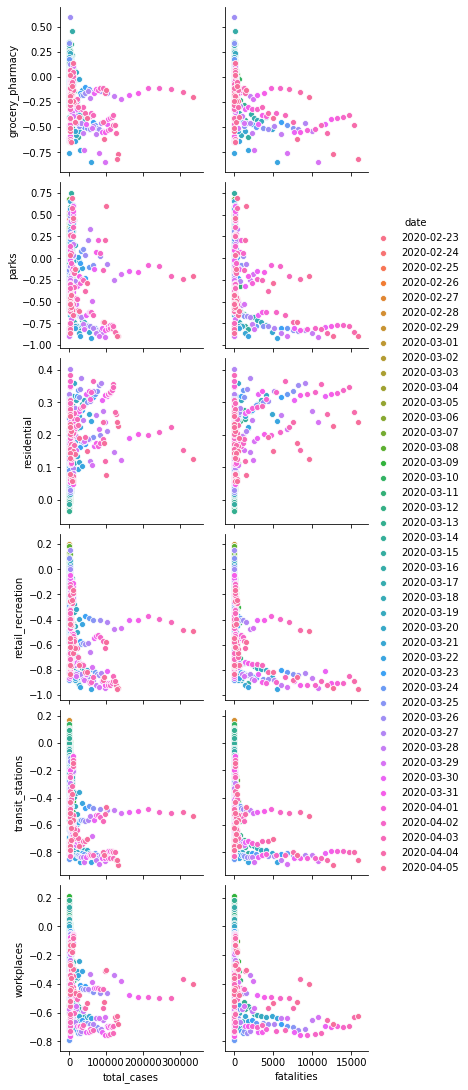

In [166]:
sb.pairplot(covid_data, hue="date",x_vars = ["total_cases","fatalities"], 
            y_vars = ["grocery_pharmacy","parks","residential",
                      "retail_recreation","transit_stations","workplaces"])

In [5]:
covid_data['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Germany', 'Spain',
       'France', 'United Kingdom', 'Indonesia', 'India', 'Italy', 'Japan',
       'South Korea', 'Mexico', 'Saudi Arabia', 'Sweden', 'Turkey', 'US',
       'South Africa'], dtype=object)

In [6]:
assert len(covid_data['country'].unique()) == 19

In [169]:
ar_covid_data = covid_data.loc[(covid_data['country'] == 'Argentina')]
au_covid_data = covid_data.loc[(covid_data['country'] == 'Australia')]
br_covid_data = covid_data.loc[(covid_data['country'] == 'Brazil')]
ca_covid_data = covid_data.loc[(covid_data['country'] == 'Canada')]
de_covid_data = covid_data.loc[(covid_data['country'] == 'Germany')]
es_covid_data = covid_data.loc[(covid_data['country'] == 'Spain')]
fr_covid_data = covid_data.loc[(covid_data['country'] == 'France')]
gb_covid_data = covid_data.loc[(covid_data['country'] == 'United Kingdom')]
id_covid_data = covid_data.loc[(covid_data['country'] == 'Indonesia')]
in_covid_data = covid_data.loc[(covid_data['country'] == 'India')]
it_covid_data = covid_data.loc[(covid_data['country'] == 'Italy')]
jp_covid_data = covid_data.loc[(covid_data['country'] == 'Japan')]
kr_covid_data = covid_data.loc[(covid_data['country'] == 'South Korea')]
mx_covid_data = covid_data.loc[(covid_data['country'] == 'Mexico')]
sa_covid_data = covid_data.loc[(covid_data['country'] == 'Saudi Arabia')]
se_covid_data = covid_data.loc[(covid_data['country'] == 'Sweden')]
tr_covid_data = covid_data.loc[(covid_data['country'] == 'Turkey')]
us_covid_data = covid_data.loc[(covid_data['country'] == 'US')]
za_covid_data = covid_data.loc[(covid_data['country'] == 'South Africa')]

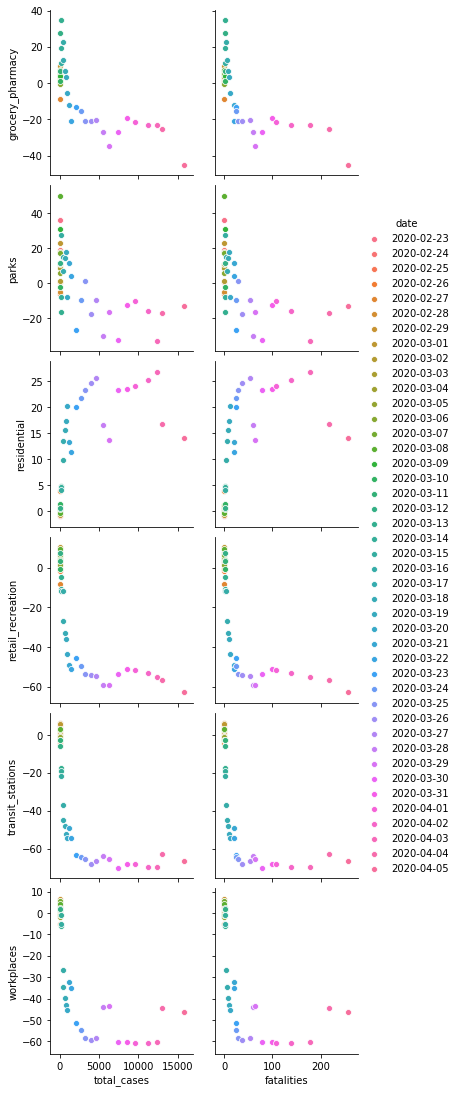

In [8]:
sb.pairplot(ca_covid_data, hue="date", x_vars = ["total_cases","fatalities"], 
            y_vars = ["grocery_pharmacy","parks","residential",
                      "retail_recreation","transit_stations","workplaces"])

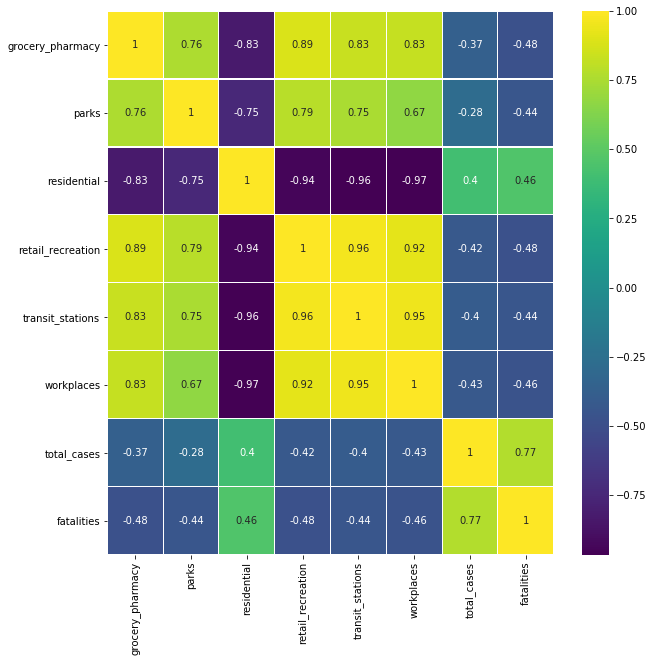

In [9]:
plt.figure(figsize=(10,10))
sb.heatmap(covid_data.corr(),cmap="viridis",
           annot=True,linewidth=0.1)

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale

print(predictors)
X = covid_data[predictors]

Y1 = covid_data['total_cases']
Y2 = covid_data['fatalities']

X_train, X_test, Y1_train, Y1_test = train_test_split(X,
                                                      Y2,
                                                      test_size = 0.2,
                                                      random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

['grocery_pharmacy', 'parks', 'workplaces', 'retail_recreation', 'residential', 'transit_stations']
Training Data Count: 653
Testing Data Count: 164


In [202]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

##X_train = sm.add_constant(X_train)
##results = sm.OLS(Y1_train, X_train).fit()
##results.summary()

from IPython.display import display
##import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.datasets import make_regression

# Generate a simple dataset
regr_1 = DecisionTreeRegressor(random_state=0, max_depth=3)
print(regr_1.fit(X_train, Y1_train))
print(regr_1.score(X_test,Y1_test))


In [246]:
from IPython.display import display

##import graphviz 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz 
from sklearn.datasets import make_regression

##Generate a simple dataset
regr_1 = DecisionTreeRegressor(random_state=10, max_depth=10) 
regr_1.fit(X_train, Y1_train)

print(Y1_test.head())
output1=regr_1.predict(X_test)

print(output1[0:5])


687    401
780      0
429     99
503     43
116     46
Name: fatalities, dtype: int64
[8.35000000e+01 9.34579439e-02 1.00833333e+01 1.35454545e+01
 1.04650000e+03]


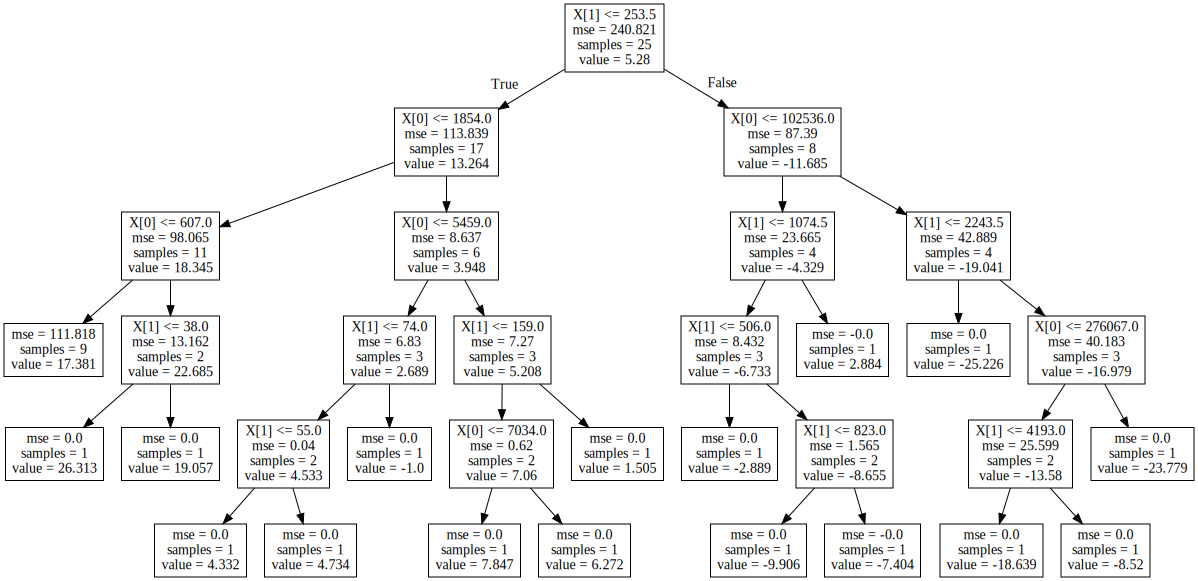

In [160]:
# Visualize the tree
display(graphviz.Source(export_graphviz(clf)))